In [26]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import psycopg2
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering,KMeans
import pandas as pd
from sklearn import linear_model

In [2]:

con = psycopg2.connect(database="tietotuotteet",user="sa_monimuotoisuus_update",password="pelinympupdatemikko",host="10.24.200.87",port="5434")


In [54]:
#sql = "SELECT * FROM monimuotoisuus.latvusrajatut_momu_test limit 50000"
sql="""(select * from monimuotoisuus.latvusrajatut_momu_test
where lcv >= 0.2 and laser_h > 20 limit 5000)
union all
(select * from monimuotoisuus.latvusrajatut_momu_test
where lcv >= 0.2 and laser_h <= 20 limit 5000)
union
(select * from monimuotoisuus.latvusrajatut_momu_test
where lcv < 0.2 and laser_h <= 20 limit 5000)
union
(select * from monimuotoisuus.latvusrajatut_momu_test
where lcv < 0.2 and laser_h > 20 limit 5000)"""
df = gpd.GeoDataFrame.from_postgis(sql=sql,con=con,geom_col='geom')
df

,objectid,id,laser_h,laser_tih,x,y,lahop,lposuus,biod,lcv,lskew,geom
0,220903,408600,21.11,75.9,202263.75,6980631.50,0.36,30.3,0.58,0.211,-0.114,"POLYGON ((202270.500 6980640.000, 202266.500 6..."
1,85863,247768,21.55,45.6,204072.75,6976680.50,0.29,32.1,0.04,0.275,0.009,"POLYGON ((204081.000 6976688.000, 204081.000 6..."
2,213162,375809,21.76,69.0,200662.00,6980952.00,0.39,29.1,0.25,0.228,-0.024,"POLYGON ((200672.000 6980960.000, 200667.500 6..."
3,212129,262765,20.95,71.6,202440.00,6977991.50,0.29,38.0,0.25,0.286,0.122,"POLYGON ((202448.000 6978000.000, 202446.000 6..."
4,37503,216445,20.76,59.8,201927.50,6976856.00,0.28,23.9,0.22,0.237,-0.013,"POLYGON ((201936.000 6976862.000, 201935.500 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,586600,14421718,21.08,78.7,211993.75,7018024.00,1.00,37.1,0.41,0.159,-0.050,"POLYGON ((212004.500 7018031.500, 212004.000 7..."
19996,407995,777357,19.02,76.4,209415.75,6985911.00,0.23,26.6,0.15,0.198,-0.023,"POLYGON ((209425.500 6985920.500, 209424.000 6..."
19997,406428,648987,13.29,89.2,209991.50,6984967.00,0.20,21.9,0.12,0.138,0.095,"POLYGON ((209997.500 6984976.000, 209997.000 6..."
19998,408007,650444,17.06,64.5,209735.75,6985095.00,0.24,24.6,0.64,0.145,-0.102,"POLYGON ((209743.000 6985103.500, 209743.000 6..."


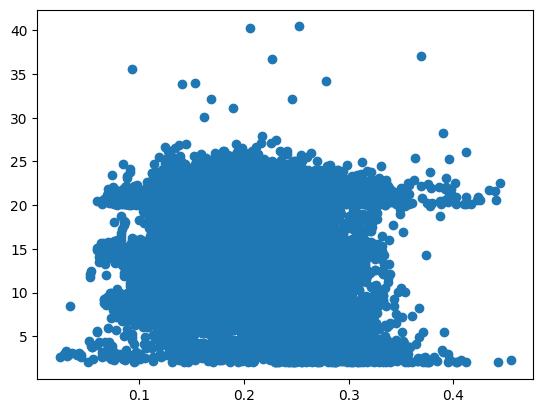

In [55]:
plt.scatter(df['lcv'],df['laser_h'])
plt.show()

In [56]:
data = list(zip(df['lcv'],df['laser_h']))

#linkage_data = linkage(data, method='ward', metric='euclidean')
#dendrogram(linkage_data)

#plt.show()

C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\clust

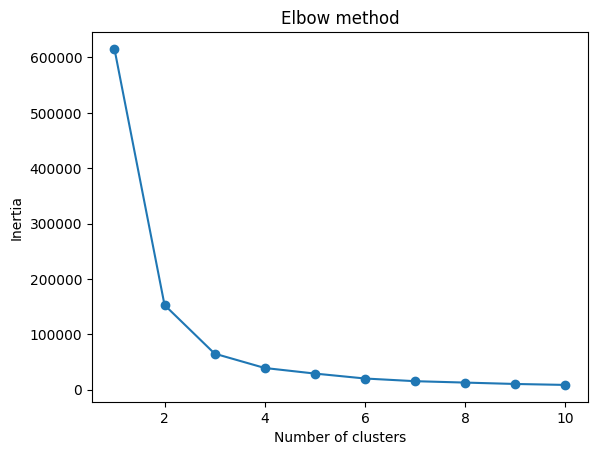

In [57]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


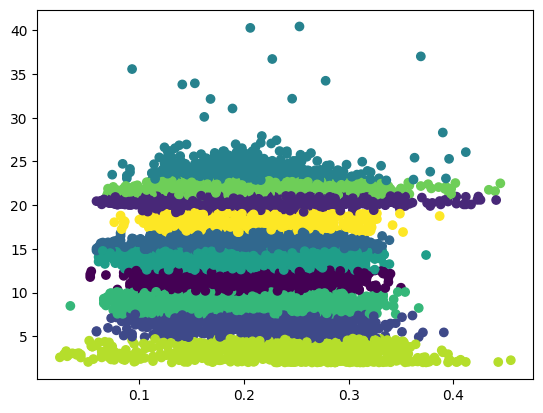

In [60]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)

plt.scatter(df['lcv'],df['laser_h'], c=kmeans.labels_)
plt.show()

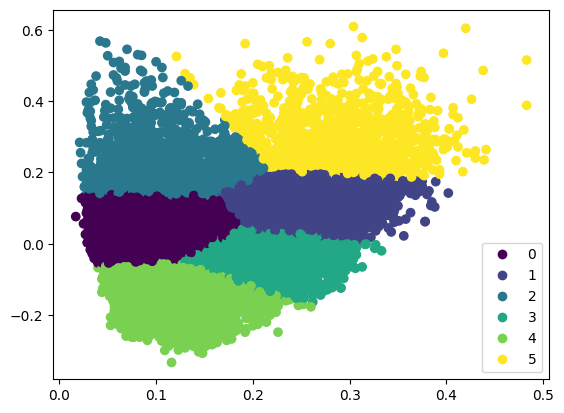

In [22]:
fig, ax = plt.subplots()
scatter = ax.scatter(df['lcv'],df['lskew'], c=kmeans.labels_)
legend = ax.legend(*scatter.legend_elements())
plt.show()

In [23]:
label_df = pd.DataFrame(kmeans.labels_)
#label_df
join = pd.concat([df,label_df],axis=1)
join.rename(columns = {0:"class"},inplace=True)
join

,objectid,id,laser_h,laser_tih,x,y,lahop,lposuus,biod,lcv,lskew,geom,class
0,2085188,2628799,8.41,24.3,217208.00,6999176.50,0.16,24.4,0.58,0.264,0.190,"POLYGON ((217216.000 6999168.000, 217216.000 6...",1
1,2114264,2412025,4.10,9.0,220456.00,6993496.00,0.09,28.9,0.54,0.243,0.177,"POLYGON ((220464.000 6993488.000, 220464.000 6...",1
2,2086612,2716152,13.88,73.1,216630.00,7001720.25,0.18,18.5,0.62,0.251,0.088,"POLYGON ((216640.000 7001729.000, 216639.500 7...",1
3,2112278,2427518,3.95,24.8,219048.25,6993720.00,0.13,23.6,0.61,0.286,0.176,"POLYGON ((219056.000 6993713.000, 219054.500 6...",1
4,2108531,2425295,18.30,36.5,220888.75,6994664.25,0.44,22.0,0.43,0.227,0.006,"POLYGON ((220897.500 6994659.000, 220897.500 6...",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2184055,2670071,7.15,65.2,221192.25,7000343.00,0.16,20.8,0.54,0.103,0.053,"POLYGON ((221200.000 7000352.000, 221199.000 7...",0
19996,2165049,2575183,16.06,47.0,221449.25,6996983.25,0.79,21.7,0.21,0.159,-0.094,"POLYGON ((221455.500 6996992.000, 221449.000 6...",4
19997,2179548,2678072,6.07,54.3,222472.00,6998712.00,0.07,29.2,0.10,0.092,0.099,"POLYGON ((222480.000 6998704.000, 222480.000 6...",0
19998,2163428,2524534,13.34,44.4,220999.50,6996006.75,0.20,33.4,0.49,0.167,-0.210,"POLYGON ((221008.000 6996015.500, 221007.500 6...",4


In [24]:
ohe_class = pd.get_dummies(join[['class']])

In [25]:
X = join[['lcv','lskew']]
y = join['class']

In [31]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [33]:
predictedClass = logr.predict([[0.1,0.01]])
print (predictedClass)

[0]


C:\OSGeo4W\apps\Python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
sqlp = "SELECT * FROM monimuotoisuus.latvusrajatut_momu_test order by id asc limit 500"
df_predict = gpd.GeoDataFrame.from_postgis(sql=sqlp,con=con,geom_col='geom')
df_predict
j = pd.DataFrame([])
j = pd.concat([j,df_predict],axis=0)
j

,objectid,id,laser_h,laser_tih,x,y,lahop,lposuus,biod,lcv,lskew,geom
0,4472,12080,9.35,48.5,201256.75,6971528.25,0.15,28.7,0.21,0.207,-0.024,"POLYGON ((201264.500 6971536.000, 201264.000 6..."
1,4473,12081,9.75,88.3,201272.25,6971528.25,0.17,26.8,0.41,0.208,0.008,"POLYGON ((201278.000 6971539.000, 201277.500 6..."
2,4385,12082,10.53,68.1,201287.50,6971528.00,0.18,29.4,0.41,0.204,0.006,"POLYGON ((201296.500 6971535.000, 201296.500 6..."
3,5082,12083,11.04,80.3,201303.50,6971527.75,0.12,31.9,0.32,0.209,0.000,"POLYGON ((201311.000 6971537.000, 201311.000 6..."
4,3995,12084,11.83,94.2,201318.75,6971529.25,0.16,32.8,0.56,0.238,0.054,"POLYGON ((201323.500 6971537.500, 201323.000 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...
495,5094,13581,12.68,69.6,201607.50,6971703.75,0.18,22.9,0.58,0.133,-0.025,"POLYGON ((201614.000 6971712.000, 201613.000 6..."
496,3986,13582,15.13,76.9,201623.50,6971705.25,0.19,31.8,0.63,0.140,-0.036,"POLYGON ((201631.500 6971712.500, 201631.500 6..."
497,4950,13583,15.01,52.5,201640.00,6971702.50,0.22,22.3,0.63,0.146,-0.068,"POLYGON ((201648.000 6971712.000, 201642.500 6..."
498,5407,13584,15.06,72.0,201655.75,6971705.00,0.21,27.6,0.54,0.166,-0.059,"POLYGON ((201661.000 6971713.500, 201660.500 6..."


In [47]:
print (np.count_nonzero(df_predict['id']))

500


In [37]:
predictedClass = logr.predict(df_predict[['lcv','lskew']])
#predictedClass

array([3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 1, 1, 1, 1, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 4, 4, 4, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3,
       3, 1, 1, 1, 1, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 4, 0, 4, 0, 0, 0, 0,
       0, 3, 4, 4, 4, 4, 4, 3, 3, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 3,
       3, 1, 1, 1, 1, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 4, 4, 4, 4, 3, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 4, 3, 3,
       3, 1, 3, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 2, 2, 1, 3, 3,
       3, 1, 1, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 2, 2, 1, 1, 3,
       3, 3, 1, 1, 1, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3,

In [53]:
i = 0
m=0
j = pd.DataFrame([])
while True:
    sqlp = "SELECT * FROM monimuotoisuus.latvusrajatut_momu_test where id > "+str(m)+" order by id asc limit 50000"
    df_predict = gpd.GeoDataFrame.from_postgis(sql=sqlp,con=con,geom_col='geom')
    m = np.max(df_predict['id'])
    print (m)
    predictedClass = logr.predict(df_predict[['lcv','lskew']])
    predictedClass_df = pd.DataFrame(predictedClass)
    join = pd.concat([df,predictedClass_df],axis=1)        
    join.rename(columns = {0:"class"},inplace=True)
    j = pd.concat([j,join],axis=0)
    #join.to_file(r"S:\test_mjk\aineistot\Mallinnus\latvusrajatut22.gpkg",layer="Vaasa_testi",driver="GPKG")
    i+=1
    if i >=2:
        break
    
j.to_file(r"S:\test_mjk\aineistot\Mallinnus\latvusrajatut22.gpkg",layer="Vaasa_testi",driver="GPKG")

98838
174146


In [51]:
#join.to_file(r"S:\test_mjk\aineistot\Mallinnus\latvusrajatut.gpkg",layer="Vaasa_testi",driver="GPKG")